In [24]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

Path for current Tests

In [25]:
inPath = os.getcwd().split("\\SVSModelBuildDeploy\\")[0]+"\\SVSModelBuildDeploy\\TestComponents\\TestSets\\Moisture\\Outputs\\"
outPath = os.getcwd().split("\\SVSModelBuildDeploy\\")[0]+"\\SVSModelBuildDeploy\\TestGraphs\\Outputs\\"

Get names and results from each test

In [26]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [27]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(inPath+t,index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

In [28]:
AllData.columns

MultiIndex([('Dry_Full', 'SoilMineralN'),
            ('Dry_Full',      'UptakeN'),
            ('Dry_Full',     'ResidueN'),
            ('Dry_Full',      'SoilOMN'),
            ('Dry_Full',  'FertiliserN'),
            ('Dry_Full',        'CropN'),
            ('Dry_Full',     'ProductN'),
            ('Dry_Full',        'LostN'),
            ('Dry_Full',         'RSWC'),
            ('Dry_Full',     'Drainage'),
            ...
            ('Wet_Some',     'ResidueN'),
            ('Wet_Some',      'SoilOMN'),
            ('Wet_Some',  'FertiliserN'),
            ('Wet_Some',        'CropN'),
            ('Wet_Some',     'ProductN'),
            ('Wet_Some',        'LostN'),
            ('Wet_Some',         'RSWC'),
            ('Wet_Some',     'Drainage'),
            ('Wet_Some',   'Irrigation'),
            ('Wet_Some',  'Green cover')],
           length=180)

Make graph

In [29]:
colors = ['purple','purple','purple','green','green','green','red','red','red','blue','blue','blue','orange','orange','orange']
lines = ['-','--',':','-','--',':','-','--',':','-','--',':','-','--',':']

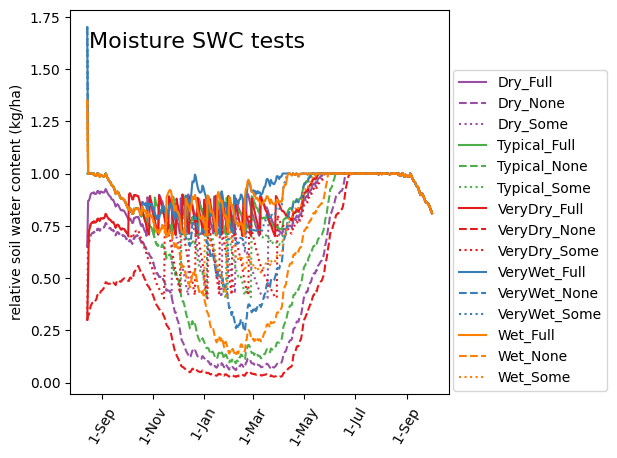

In [48]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'RSWC')],lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('relative soil water content (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Moisture SWC tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(outPath+'\\Moisture_SWC.png')

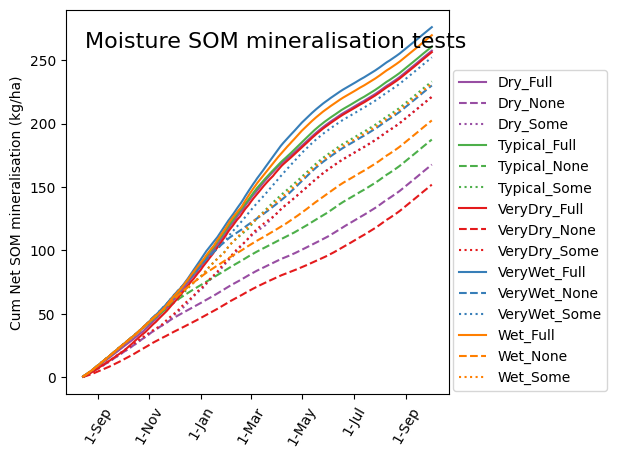

In [49]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'SoilOMN')].cumsum(),lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net SOM mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Moisture SOM mineralisation tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(outPath+'\\Moisture_SOM.png')

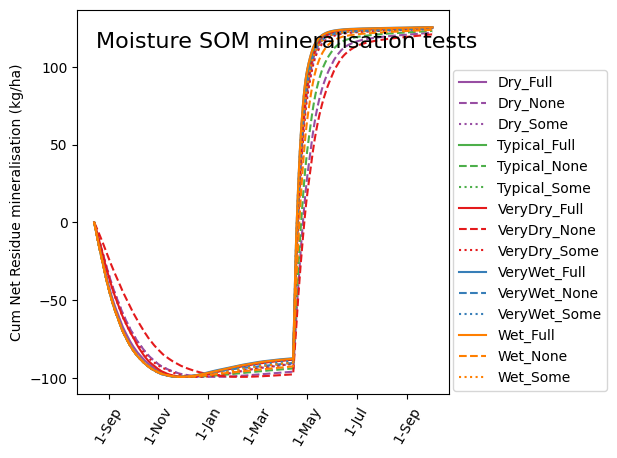

In [50]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'ResidueN')].cumsum(),lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net Residue mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Moisture SOM mineralisation tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(outPath+'\\Moisture_redisue.png')

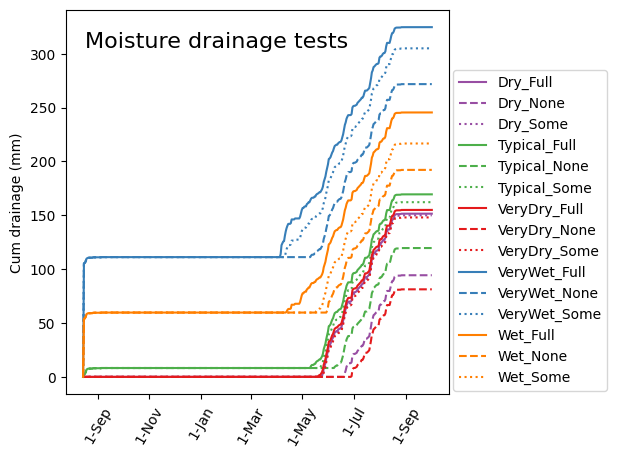

In [51]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'Drainage')].cumsum(),lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum drainage (mm)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Moisture drainage tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(outPath+'\\Moisture_Drianage.png')

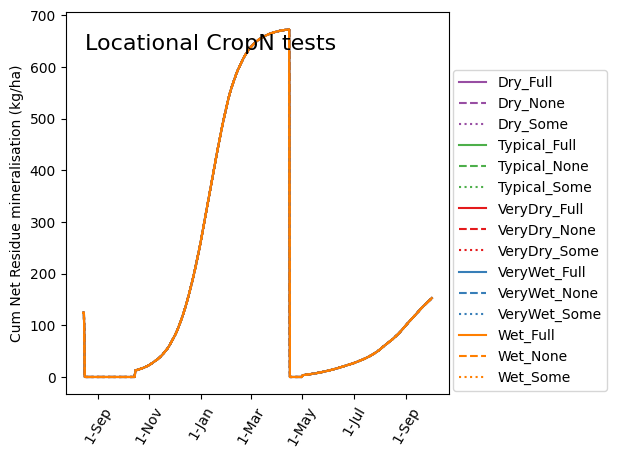

In [52]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'CropN')],lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net Residue mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Locational CropN tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(outPath+'\\Moisture_CropN.png')